# Лабораторная работа № 1. Кластеризация филиалов сети магазинов

Выполнил: Голдобин Илья N34523

Цель работы: провести кластеризацию данных из учебного датасета методами иерархической кластеризации и KMeans

Задачи: 
    1. Пользуясь кластерным анализом разделить магазины на группы.
    2. Охарактеризовать каждую группу.
    3. Сравнить полученные группы по уровню продаж

Импорт библиотек

In [1]:
import pandas as pd # Для работы с табличными данными
import numpy as np # Для работы с массивами

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

Читаем данные из файла, приводим их к типу данных dataframe, выводим данные

In [2]:
df_shops = pd.read_csv('branch.dat', encoding = 'cp1251', sep = ';', index_col = 'НАЗВАНИЕ')
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,миним,лучше,5,Есть,Вывеска,1.00,49000
Филиал 2,80,18,средний,одинак,20,Нет,Витрина,0.95,24000
Филиал 3,240,54,макс,одинак,10,Есть,Св+Ви,1.05,125000
Филиал 4,160,57,средний,одинак,30,Нет,Световая,1.00,85000
Филиал 5,270,68,широкий,лучше,15,Есть,Св+Ви,1.05,130000
Филиал 6,100,28,средний,одинак,10,Есть,Вывеска,0.95,42000
Филиал 7,130,20,средний,хуже,5,Есть,Бедно,1.00,40000
Филиал 8,310,66,макс,лучше,25,Есть,Св+Ви,0.90,153000
Филиал 9,140,38,средний,лучше,10,Нет,Св+Ви,1.00,60000


Удаляем пробелы в столбцах с текстовыми переменными для последующей их замены на числовые переменные
Функция str.strip() взята из библиотеки Pandas. Без аргументов удаляет пробелы с обоих концов строки.

In [3]:
for col in ['АССОРТИМ', 'КОНКУРЕН', 'КОНСУЛЬТ', 'ДИЗАЙН']:
    df_shops[col] = df_shops[col].str.strip()

Рассмотрим уникальные значения в столбцах АССОРТИМ, КОНКУРЕН и КОНСУЛЬТ, содержащих текстовые переменные, для последующей замены их на числовые переменные

In [4]:
print(df_shops['АССОРТИМ'].unique())
print(df_shops['КОНКУРЕН'].unique())
print(df_shops['КОНСУЛЬТ'].unique())

['миним' 'средний' 'макс' 'широкий']
['лучше' 'одинак' 'хуже']
['Есть' 'Нет']


Заменим текстовые значения в столбцах АССОРТИМ, КОНКУРЕН и КОНСУЛЬТ на числовые и выведем преобразованные данные

In [5]:
df_shops['АССОРТИМ'] = df_shops['АССОРТИМ'].map({'миним': 0, 'средний': 1, 'широкий': 2, 'макс': 3})
df_shops['КОНКУРЕН'] = df_shops['КОНКУРЕН'].map({'хуже': 0, 'одинак': 1, 'лучше': 2})
df_shops['КОНСУЛЬТ'] = df_shops['КОНСУЛЬТ'].map({'Нет': 0, 'Есть': 1})
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,0,2,5,1,Вывеска,1.00,49000
Филиал 2,80,18,1,1,20,0,Витрина,0.95,24000
Филиал 3,240,54,3,1,10,1,Св+Ви,1.05,125000
Филиал 4,160,57,1,1,30,0,Световая,1.00,85000
Филиал 5,270,68,2,2,15,1,Св+Ви,1.05,130000
Филиал 6,100,28,1,1,10,1,Вывеска,0.95,42000
Филиал 7,130,20,1,0,5,1,Бедно,1.00,40000
Филиал 8,310,66,3,2,25,1,Св+Ви,0.90,153000
Филиал 9,140,38,1,2,10,0,Св+Ви,1.00,60000


Рассмотрим уникальные значения в столбце ДИЗАЙН, содержащих текстовые переменные, для последующей замены их на числовые переменные

In [6]:
df_shops['ДИЗАЙН'].unique()

array(['Вывеска', 'Витрина', 'Св+Ви', 'Световая', 'Бедно', 'Вы+Ви'],
      dtype=object)

Используем функцию get_dummies чтобы разбить столбец ДИЗАЙН на столбцы Вывеска, Витрина, Св+Ви, Световая, Бедно, Вы+Ви. После чего удалим столбец Бедно, так как он ничего не дает. Далее скорректируем значения столбцов Вывеска, Витрина, Световая на основе столбцов Св+Ви и Вы+Ви, после чего удалим эти 2 столбца. Далее совмещаем новые столбцы с основной таблицей и убираем столбец ДИЗАЙН

In [7]:
new_col = pd.get_dummies(df_shops['ДИЗАЙН'])

new_col = new_col.drop('Бедно', axis=1)

new_col.loc[new_col['Вы+Ви'] == 1, 'Вывеска'] = 1
new_col.loc[new_col['Вы+Ви'] == 1, 'Витрина'] = 1
new_col = new_col.drop('Вы+Ви', axis=1)

new_col.loc[new_col['Св+Ви'] == 1, 'Световая'] = 1
new_col.loc[new_col['Св+Ви'] == 1, 'Витрина'] = 1
new_col = new_col.drop('Св+Ви', axis=1)


df_shops = pd.concat([df_shops, new_col], axis=1)
df_shops = df_shops.rename(columns={'Вывеска': 'ВЫВЕСКА', 'Витрина': 'ВИТРИНА', 'Световая': 'СВЕТОВАЯ'})
df_shops = df_shops.drop('ДИЗАЙН', axis=1)
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,49000,0,1,0
Филиал 2,80,18,1,1,20,0,0.95,24000,1,0,0
Филиал 3,240,54,3,1,10,1,1.05,125000,1,0,1
Филиал 4,160,57,1,1,30,0,1.00,85000,0,0,1
Филиал 5,270,68,2,2,15,1,1.05,130000,1,0,1
Филиал 6,100,28,1,1,10,1,0.95,42000,0,1,0
Филиал 7,130,20,1,0,5,1,1.00,40000,0,0,0
Филиал 8,310,66,3,2,25,1,0.90,153000,1,0,1
Филиал 9,140,38,1,2,10,0,1.00,60000,1,0,1


Удалим столбец ПРОДАЖИ, чтобы сравнить полученные в результате кластеризации группы по уровню продаж. Сохраним продажи в список

In [8]:
sales = df_shops['ПРОДАЖИ'].tolist()
df_shops = df_shops.drop('ПРОДАЖИ', axis=1)
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,0,1,0
Филиал 2,80,18,1,1,20,0,0.95,1,0,0
Филиал 3,240,54,3,1,10,1,1.05,1,0,1
Филиал 4,160,57,1,1,30,0,1.00,0,0,1
Филиал 5,270,68,2,2,15,1,1.05,1,0,1
Филиал 6,100,28,1,1,10,1,0.95,0,1,0
Филиал 7,130,20,1,0,5,1,1.00,0,0,0
Филиал 8,310,66,3,2,25,1,0.90,1,0,1
Филиал 9,140,38,1,2,10,0,1.00,1,0,1


Данные в разных столбцах таблицы находятся в разных диапазонах, что может привести к ошибкам при кластеризации, необходимо нормировать данные. Если в данных есть выбросы, это может привести к ошибкам при minmax и maxabs нормализации, поэтому проверим есть ли выбросы

In [9]:
df_shops.describe()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,163.500000,39.350000,1.450000,1.050000,15.250000,0.550000,0.990000,0.600000,0.35000,0.300000
std,64.585724,15.934983,0.998683,0.759155,9.101041,0.510418,0.057583,0.502625,0.48936,0.470162
min,80.000000,18.000000,0.000000,0.000000,5.000000,0.000000,0.900000,0.000000,0.00000,0.000000
25%,117.500000,27.000000,1.000000,0.750000,8.750000,0.000000,0.950000,0.000000,0.00000,0.000000
50%,150.000000,38.500000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,0.00000,0.000000
75%,195.000000,54.250000,2.000000,2.000000,21.250000,1.000000,1.000000,1.000000,1.00000,1.000000
max,310.000000,68.000000,3.000000,2.000000,35.000000,1.000000,1.100000,1.000000,1.00000,1.000000


Выбросов в данных не обнаружено, поэтому можно использовать minmax нормализацию данных

In [10]:
from sklearn import preprocessing

# Выбираем один из вариантов нормализации

# norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df_shops)
# преобразовываем данные с параметрами
df_shops_norm = norm.transform(df_shops)
# Полученный на предыдущем шаге объект X - это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
df_shops_norm = pd.DataFrame(df_shops_norm, index = df_shops.index, columns = df_shops.columns)
df_shops_norm

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,
Филиал 1,0.173913,0.48,0.000000,1.0,0.000000,1.0,0.50,0.0,1.0,0.0
Филиал 2,0.000000,0.00,0.333333,0.5,0.500000,0.0,0.25,1.0,0.0,0.0
Филиал 3,0.695652,0.72,1.000000,0.5,0.166667,1.0,0.75,1.0,0.0,1.0
Филиал 4,0.347826,0.78,0.333333,0.5,0.833333,0.0,0.50,0.0,0.0,1.0
Филиал 5,0.826087,1.00,0.666667,1.0,0.333333,1.0,0.75,1.0,0.0,1.0
Филиал 6,0.086957,0.20,0.333333,0.5,0.166667,1.0,0.25,0.0,1.0,0.0
Филиал 7,0.217391,0.04,0.333333,0.0,0.000000,1.0,0.50,0.0,0.0,0.0
Филиал 8,1.000000,0.96,1.000000,1.0,0.666667,1.0,0.00,1.0,0.0,1.0
Филиал 9,0.260870,0.40,0.333333,1.0,0.166667,0.0,0.50,1.0,0.0,1.0


Данные подготовлены, можно начинать кластеризацию

# Метод иерархической кластериации

Импорт библиотек

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Произведем рассчет расстояний между наблюдениями из таблицы с данными

In [12]:
link = linkage(df_shops_norm, 'average', 'cityblock')
link

array([[ 5.        , 11.        ,  0.78681159,  2.        ],
       [ 2.        ,  4.        ,  1.41043478,  2.        ],
       [ 1.        , 12.        ,  1.55405797,  2.        ],
       [16.        , 22.        ,  1.61036232,  3.        ],
       [ 0.        , 13.        ,  1.65768116,  2.        ],
       [ 8.        ,  9.        ,  1.71043478,  2.        ],
       [10.        , 19.        ,  1.89028986,  2.        ],
       [ 7.        , 21.        ,  1.96246377,  3.        ],
       [ 6.        , 18.        ,  2.00724638,  2.        ],
       [20.        , 24.        ,  2.25586957,  4.        ],
       [17.        , 23.        ,  2.56038647,  4.        ],
       [28.        , 29.        ,  2.81481884,  6.        ],
       [ 3.        , 25.        ,  2.82188406,  3.        ],
       [30.        , 32.        ,  3.26101449,  7.        ],
       [14.        , 27.        ,  3.49932367,  4.        ],
       [15.        , 31.        ,  3.75461353,  7.        ],
       [26.        , 33.

Для наглядности построим дендограмму, показывающую результаты рассчета расстояний 

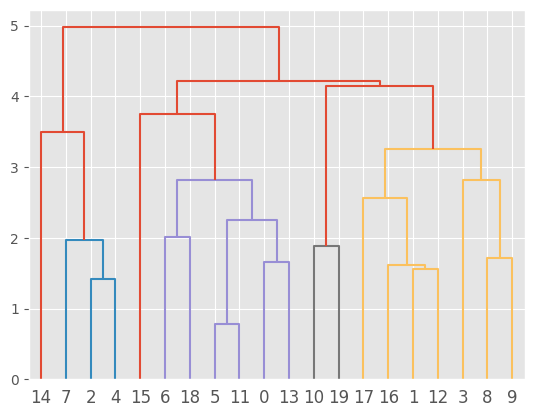

In [13]:
dn_shops = dendrogram(link)

В 3 столбце переменной link, полученной ранее, хранится расстояние между объектами объединенными в кластер. На этапе перед тем, как этот показатель делает резкий скачок, можно считать, что получено наиболее оптимальное разбиение по кластерам

In [14]:
dist = link[:, 2]
dist


array([0.78681159, 1.41043478, 1.55405797, 1.61036232, 1.65768116,
       1.71043478, 1.89028986, 1.96246377, 2.00724638, 2.25586957,
       2.56038647, 2.81481884, 2.82188406, 3.26101449, 3.49932367,
       3.75461353, 4.14847826, 4.22200138, 4.97563406])

Построим график зависимости расстояния между объединенными в кластер объектами и шагом слияния

Text(7.3, 4.53, '2 clusters')

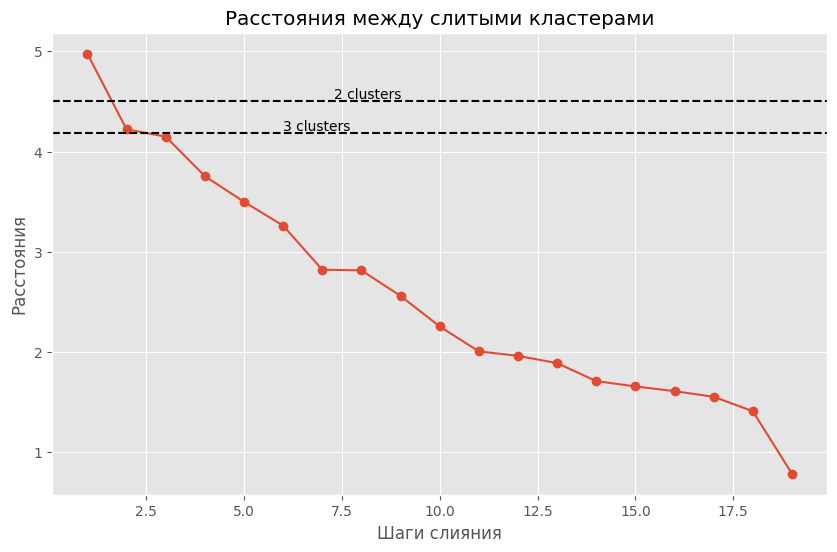

In [15]:
plt.figure(figsize = (10,6)) # Размер графика
dist_rev = dist[::-1] # Отсортировали расстояния по убыванию
idxs = range(1, len(dist) + 1) # Создали индексы от 1 до 17 (включительно)
plt.plot(idxs, dist_rev, marker = 'o') # Нарисовали график (выделили точки)
plt.title('Расстояния между слитыми кластерами') # Заголовок графика
plt.xlabel('Шаги слияния') # Подпись оси Х
plt.ylabel('Расстояния') # Подпись оси Y
plt.axhline(4.18, c = 'k', linestyle = 'dashed') # Добавили нижнюю пунктирную линию
plt.axhline(4.5, c = 'k', linestyle = 'dashed') # Добавили верхнюю пунктирную линию
plt.text(6, 4.21, '3 clusters') # Подписали нижнюю пунктирную линию
plt.text(7.3, 4.53, '2 clusters') # Подписали верхнюю пунктирную линию

Выберем произвольное значение из промежутка 4.22200138 - 4.97563406. Пусть это будет 4.5. Определим, что расстояние между объектами объединенными в кластер не может превышать это значение. В реузльтате получим 2 кластера. 
Добавим в таблицу столбец, содержащий номер кластера.
Добавим в таблицу удаленные ранее данные о продажах

In [16]:
df_shops['КЛАСТЕР'] = fcluster(link, 4.5, criterion = 'distance') 
df_shops['ПРОДАЖИ'] = sales
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,КЛАСТЕР,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,0,1,0,2,49000
Филиал 2,80,18,1,1,20,0,0.95,1,0,0,2,24000
Филиал 3,240,54,3,1,10,1,1.05,1,0,1,1,125000
Филиал 4,160,57,1,1,30,0,1.00,0,0,1,2,85000
Филиал 5,270,68,2,2,15,1,1.05,1,0,1,1,130000
Филиал 6,100,28,1,1,10,1,0.95,0,1,0,2,42000
Филиал 7,130,20,1,0,5,1,1.00,0,0,0,2,40000
Филиал 8,310,66,3,2,25,1,0.90,1,0,1,1,153000
Филиал 9,140,38,1,2,10,0,1.00,1,0,1,2,60000


Рассмотрим средние значения всех показателей для обоих кластеров

In [17]:
df_shops.groupby('КЛАСТЕР').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,ПРОДАЖИ
КЛАСТЕР,,,,,,,,,,,
1,267.5,61.5000,2.750,1.5000,18.750,1.0000,0.97500,1.0,0.250,0.7500,125750.0
2,137.5,33.8125,1.125,0.9375,14.375,0.4375,0.99375,0.5,0.375,0.1875,46250.0


Рассмотрим размеры полученных кластеров

In [18]:
df_shops.groupby('КЛАСТЕР').size()

КЛАСТЕР
1     4
2    16
dtype: int64

Рассмотрим членов первого кластера

In [19]:
df_shops[df_shops['КЛАСТЕР'] == 1]

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,КЛАСТЕР,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 3,240,54,3,1,10,1,1.05,1,0,1,1,125000
Филиал 5,270,68,2,2,15,1,1.05,1,0,1,1,130000
Филиал 8,310,66,3,2,25,1,0.90,1,0,1,1,153000
Филиал 15,250,58,3,1,25,1,0.90,1,1,0,1,95000


Рассмотрим членов второго кластера

In [20]:
df_shops[df_shops['КЛАСТЕР'] == 2]

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,КЛАСТЕР,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,0,1,0,2,49000
Филиал 2,80,18,1,1,20,0,0.95,1,0,0,2,24000
Филиал 4,160,57,1,1,30,0,1.00,0,0,1,2,85000
Филиал 6,100,28,1,1,10,1,0.95,0,1,0,2,42000
Филиал 7,130,20,1,0,5,1,1.00,0,0,0,2,40000
Филиал 9,140,38,1,2,10,0,1.00,1,0,1,2,60000
Филиал 10,170,42,2,1,5,0,1.10,1,0,1,2,65000
Филиал 11,100,24,0,0,35,0,0.95,0,0,0,2,35000
Филиал 12,90,20,1,1,20,1,1.00,0,1,0,2,22000


Исходя из показателей, можно сказать что кластер № 1 содержит наиболее успешные, большие, посещаемые филиалы с богатым ассортиментом, каждый из которых как минимум не хуже ближайших конкурентов.
Результаты кластеризации подтверждаются значением продаж: филиалы из первого кластера являются лидерами по продажам среди всех филиалов и превосходят филиалы из второго кластера

# Метод KMeans

Удалим полученные ранее столбцы ПРОДАЖИ и КЛАСТЕР

In [21]:
df_shops = df_shops.drop(['КЛАСТЕР', 'ПРОДАЖИ'], axis=1)
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,0,1,0
Филиал 2,80,18,1,1,20,0,0.95,1,0,0
Филиал 3,240,54,3,1,10,1,1.05,1,0,1
Филиал 4,160,57,1,1,30,0,1.00,0,0,1
Филиал 5,270,68,2,2,15,1,1.05,1,0,1
Филиал 6,100,28,1,1,10,1,0.95,0,1,0
Филиал 7,130,20,1,0,5,1,1.00,0,0,0
Филиал 8,310,66,3,2,25,1,0.90,1,0,1
Филиал 9,140,38,1,2,10,0,1.00,1,0,1


Воспользуемся способом стандартной нормировки данных

In [22]:
norm = preprocessing.StandardScaler()
norm.fit(df_shops)
df_shops_norm = norm.transform(df_shops)
df_shops_norm = pd.DataFrame(df_shops_norm, index = df_shops.index, columns = df_shops.columns)
df_shops_norm

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,
Филиал 1,-0.691020,0.170621,-1.489630,1.283901,-1.155503,0.904534,0.178174,-1.224745,1.362770,-0.654654
Филиал 2,-1.326442,-1.374626,-0.462299,-0.067574,0.535477,-1.105542,-0.712697,0.816497,-0.733799,-0.654654
Филиал 3,1.215243,0.943244,1.592363,-0.067574,-0.591843,0.904534,1.069045,0.816497,-0.733799,1.527525
Филиал 4,-0.055599,1.136400,-0.462299,-0.067574,1.662797,-1.105542,0.178174,-1.224745,-0.733799,1.527525
Филиал 5,1.691809,1.844638,0.565032,1.283901,-0.028183,0.904534,1.069045,0.816497,-0.733799,1.527525
Филиал 6,-1.008731,-0.730773,-0.462299,-0.067574,-0.591843,0.904534,-0.712697,-1.224745,1.362770,-0.654654
Филиал 7,-0.532165,-1.245855,-0.462299,-1.419048,-1.155503,0.904534,0.178174,-1.224745,-0.733799,-0.654654
Филиал 8,2.327230,1.715868,1.592363,1.283901,1.099137,0.904534,-1.603567,0.816497,-0.733799,1.527525
Филиал 9,-0.373310,-0.086920,-0.462299,1.283901,-0.591843,-1.105542,0.178174,0.816497,-0.733799,1.527525


Для выбора количества предполагаемых кластеров воспользуемся методом локтя

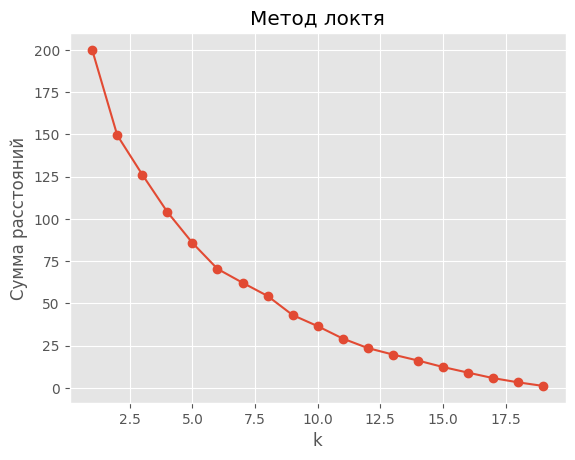

In [23]:
from sklearn.cluster import KMeans

K = range(1, 20)
models = [KMeans(n_clusters = k, random_state = 42).fit(df_shops_norm) for k in K]
dist = [model.inertia_ for model in models]

# Построение локтя
plt.plot(K, dist, marker = 'o') 
plt.xlabel('k')
plt.ylabel('Сумма расстояний')
plt.title('Метод локтя')
plt.show()

После разбиения на 2 кластера сильно уменьшается сумма расстояний точек до своих кластеров, далее этот покзатель уменьшается все слабее, поэтому выберем количество кластеров равное 2

In [24]:
model = KMeans(n_clusters = 2, random_state = 42)

Применим метод KMeans к нормированным ранее данным

In [25]:
model.fit(df_shops_norm)

KMeans(n_clusters=2, random_state=42)

Проверим к какому кластеру метод отнес каждый филиал

In [26]:
model.labels_

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

Добавим столбец КЛАСТЕР

In [27]:
df_shops['КЛАСТЕР'] = model.labels_
df_shops.groupby('КЛАСТЕР').size()

КЛАСТЕР
0    13
1     7
dtype: int64

Добавим столбец ПРОДАЖИ

In [28]:
df_shops['ПРОДАЖИ'] = sales
df_shops

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,КЛАСТЕР,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,0,1,0,0,49000
Филиал 2,80,18,1,1,20,0,0.95,1,0,0,0,24000
Филиал 3,240,54,3,1,10,1,1.05,1,0,1,1,125000
Филиал 4,160,57,1,1,30,0,1.00,0,0,1,1,85000
Филиал 5,270,68,2,2,15,1,1.05,1,0,1,1,130000
Филиал 6,100,28,1,1,10,1,0.95,0,1,0,0,42000
Филиал 7,130,20,1,0,5,1,1.00,0,0,0,0,40000
Филиал 8,310,66,3,2,25,1,0.90,1,0,1,1,153000
Филиал 9,140,38,1,2,10,0,1.00,1,0,1,0,60000


Рассмотрим средние показатели филиалов по кластерам

In [29]:
df_shops.groupby('КЛАСТЕР').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,ПРОДАЖИ
КЛАСТЕР,,,,,,,,,,,
0,130.000000,29.769231,0.923077,1.000000,14.615385,0.461538,0.976923,0.538462,0.461538,0.076923,38769.230769
1,225.714286,57.142857,2.428571,1.142857,16.428571,0.714286,1.014286,0.714286,0.142857,0.714286,105571.428571


Рассмотрим какие филиалы вошли в кластер № 0

In [30]:
df_shops[df_shops['КЛАСТЕР'] == 0]

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,КЛАСТЕР,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,2,5,1,1.00,0,1,0,0,49000
Филиал 2,80,18,1,1,20,0,0.95,1,0,0,0,24000
Филиал 6,100,28,1,1,10,1,0.95,0,1,0,0,42000
Филиал 7,130,20,1,0,5,1,1.00,0,0,0,0,40000
Филиал 9,140,38,1,2,10,0,1.00,1,0,1,0,60000
Филиал 11,100,24,0,0,35,0,0.95,0,0,0,0,35000
Филиал 12,90,20,1,1,20,1,1.00,0,1,0,0,22000
Филиал 13,130,39,1,0,15,0,1.00,1,0,0,0,36000
Филиал 14,190,43,1,2,5,1,1.00,1,1,0,0,64000


Рассмотрим какие филиалы вошли в кластер № 1

In [31]:
df_shops[df_shops['КЛАСТЕР'] == 1]

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ВИТРИНА,ВЫВЕСКА,СВЕТОВАЯ,КЛАСТЕР,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 3,240,54,3,1,10,1,1.05,1,0,1,1,125000
Филиал 4,160,57,1,1,30,0,1.00,0,0,1,1,85000
Филиал 5,270,68,2,2,15,1,1.05,1,0,1,1,130000
Филиал 8,310,66,3,2,25,1,0.90,1,0,1,1,153000
Филиал 10,170,42,2,1,5,0,1.10,1,0,1,1,65000
Филиал 15,250,58,3,1,25,1,0.90,1,1,0,1,95000
Филиал 16,180,55,3,0,5,1,1.10,0,0,0,1,86000


Результаты кластеризации методом KMeans похожи на результаты использования метода иерархической кластеризации для этого набора данных. Аналогично выделен кластер филиалов, показатели которых лучшие среди всех филиалов. Относительно иерархической кластеризации немного изменился состав кластеров и их размеры. Данные о продажах подтверждают результаты кластеризации. Любой филиал из кластера № 1 делает больше продаж, чем любой филиал из кластера № 0. 

# Вывод 

Исходя из результатов полученных в ходе кластеризации данных методами иерархической кластеризации и KMeans были получены 2 различных разбиения исходных данных на кластеры. Для заказчика было бы предпочтительнее показывать результаты применения метода иерархической кластеризации, т. к. при использовании этого метода было получено более четкое разделение филиалов на группы. Исходя из этого разделения можно сделать выводы о том, руководство каких филиалов хорошо справляется со своими функциями и наоборот. Также, основываяся на показателях наиболее успешных филиалов в кластере, можно выдать рекомендации остальным филиалам о том, как им увеличить продажи.